In [1]:
print('Hello World')

Hello World


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns 

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('data_preprocessed.csv',index_col=0)
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,
                                                 test_size=0.2,
                                                 random_state=1234,
                                                 shuffle=True,
                                                 stratify=target)

y_trainOHE = pd.get_dummies(y_train)
y_testOHE = pd.get_dummies(y_test)

### Modeling
```
1. tf_low
2. tf_high
3. torch_low
4. torch_high
```

In [2]:
# tensorflow low
import tensorflow as tf

x = tf.constant(x_train,tf.float32)
x_t = tf.constant(x_test,tf.float32)

y = tf.constant(y_trainOHE,tf.float32)

initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape = [21,64])) 
b1 = tf.Variable(initX(shape = [64]))

w2 = tf.Variable(initX(shape = [64,32])) 
b2 = tf.Variable(initX(shape = [32]))

w3 = tf.Variable(initX(shape = [32,3])) 
b3 = tf.Variable(initX(shape = [3]))

def cost():
    z1 = tf.matmul(x,w1) + b1
    x_hat_1 = tf.nn.relu(z1)
    
    z2 = tf.matmul(x_hat_1,w2) + b2
    x_hat_2 = tf.nn.relu(z2)
    
    z3 = tf.matmul(x_hat_2,w3) + b3
    c_i = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=z3)
    c = tf.reduce_mean(c_i)
    return c

def hxFn(x_data):
    xd = tf.constant(x_data,tf.float32)
    z1 = tf.matmul(xd,w1) + b1
    x_hat_1 = tf.nn.relu(z1)
    
    z2 = tf.matmul(x_hat_1,w2) + b2
    x_hat_2 = tf.nn.relu(z2)
    
    z3 = tf.matmul(x_hat_2,w3) + b3
    hx = tf.nn.softmax(z3)
    return hx.numpy().argmax(axis=1)

optimzier = tf.keras.optimizers.Adam(learning_rate=0.001)
tf_low_trian_acc_score = list()
tf_low_validate_acc_score = list()

for i in range(1000):
    optimzier.minimize(cost, var_list=[w1,w2,w3,b1,b2,b3])
    curent_train_acc = accuracy_score(hxFn(x)+[1],y_train)
    tf_low_trian_acc_score.append(curent_train_acc)
    curent_test_acc = accuracy_score(hxFn(x_t)+[1],y_test)
    tf_low_validate_acc_score.append(curent_test_acc)
    print(i, 'cost',cost().numpy() ,f"train_acc => {curent_train_acc}", f"test_acc => {curent_test_acc}" )

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-06 14:42:41.398813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 14:42:41.398945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


0 cost 1.1469418 train_acc => 0.7288235294117648 test_acc => 0.7276995305164319
1 cost 1.0819327 train_acc => 0.7347058823529412 test_acc => 0.7300469483568075
2 cost 1.0202562 train_acc => 0.7405882352941177 test_acc => 0.7323943661971831
3 cost 0.96065027 train_acc => 0.7452941176470588 test_acc => 0.7347417840375586
4 cost 0.9031185 train_acc => 0.7494117647058823 test_acc => 0.744131455399061
5 cost 0.8482393 train_acc => 0.7523529411764706 test_acc => 0.7535211267605634
6 cost 0.7962342 train_acc => 0.7611764705882353 test_acc => 0.7605633802816901
7 cost 0.74738115 train_acc => 0.7652941176470588 test_acc => 0.7629107981220657
8 cost 0.70195496 train_acc => 0.7729411764705882 test_acc => 0.7676056338028169
9 cost 0.66086924 train_acc => 0.7758823529411765 test_acc => 0.7723004694835681
10 cost 0.62875694 train_acc => 0.7829411764705883 test_acc => 0.7769953051643192
11 cost 0.613397 train_acc => 0.7894117647058824 test_acc => 0.7863849765258216
12 cost 0.60672545 train_acc => 0.7

In [3]:
tf_low_acc_df=pd.DataFrame([np.array(tf_low_trian_acc_score),np.array(tf_low_validate_acc_score)]).transpose()
tf_low_acc_df.columns = ['train_acc','val_acc']

In [4]:
tf_low_acc_df.to_csv('tf_low_acc_df.csv',index=False)

train_data
f1_score : 0.99456
accuracy : 0.99765


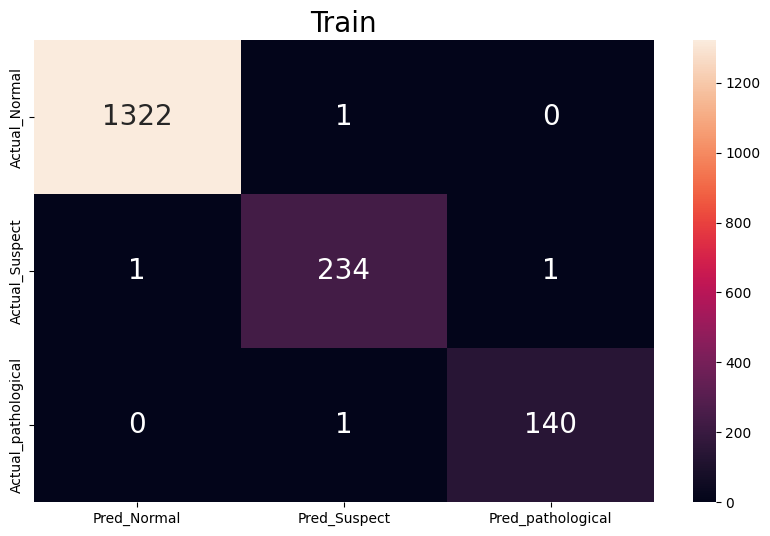

------------------------------
test_data
f1_score : 0.89127
accuracy : 0.94601


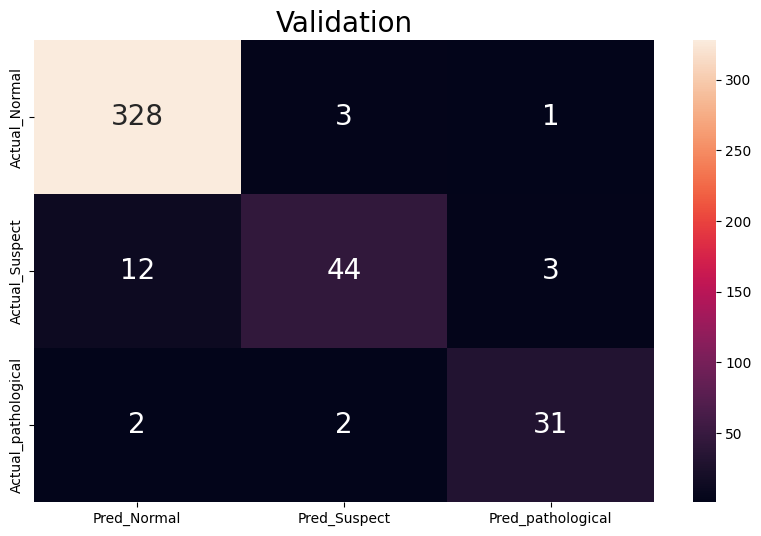

In [5]:
print('train_data')
f1_train = round(f1_score(y_train,hxFn(x)+[1],average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(y_train,hxFn(x)+[1]),5)
print(f'accuracy : {acc_train}')

plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(y_train,(hxFn(x)+[1])),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Train',fontsize=20)
plt.savefig('tf_low_conf_train.png')
plt.show()
print('-'*30)
print('test_data')

x_test_tensor = tf.constant(x_test,tf.float32)

f1_test = round(f1_score(y_test,hxFn(x_test_tensor)+[1],average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(y_test,hxFn(x_test_tensor)+[1]),5)
print(f'accuracy : {acc_test}')
plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(y_test,hxFn(x_test_tensor)+[1]),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)

plt.title('Validation',fontsize=20)
plt.savefig('tf_low_conf_test.png')
plt.show()

In [61]:
# tensorflow high

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=(21)))
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=(64)))
model.add(tf.keras.layers.Dense(3, activation='softmax',input_dim=(32)))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

model_hist=model.fit(x_train, y_trainOHE, epochs=100,
                     validation_data=(x_test,y_testOHE))

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

Epoch 1/100
14/54 [======>.......................] - ETA: 0s - loss: 1.6877 - acc: 0.4085

2022-12-06 13:50:08.144578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 12ms/step - loss: 1.0095 - acc: 0.6812 - val_loss: 0.6066 - val_acc: 0.8169
Epoch 2/100
 7/54 [==>...........................] - ETA: 0s - loss: 0.5813 - acc: 0.8125

2022-12-06 13:50:08.742108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 10ms/step - loss: 0.4781 - acc: 0.8406 - val_loss: 0.4001 - val_acc: 0.8756
Epoch 3/100
54/54 [==============================] - 1s 9ms/step - loss: 0.3559 - acc: 0.8771 - val_loss: 0.3284 - val_acc: 0.8850
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.3091 - acc: 0.8824 - val_loss: 0.3042 - val_acc: 0.8920
Epoch 5/100
54/54 [==============================] - 1s 9ms/step - loss: 0.2810 - acc: 0.8888 - val_loss: 0.2609 - val_acc: 0.9131
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.2590 - acc: 0.9012 - val_loss: 0.3367 - val_acc: 0.8897
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.2788 - acc: 0.8953 - val_loss: 0.2466 - val_acc: 0.9131
Epoch 8/100
54/54 [==============================] - 0s 9ms/step - loss: 0.2351 - acc: 0.9065 - val_loss: 0.2394 - val_acc: 0.9085
Epoch 9/100
54/54 [==============================] - 0s 9ms/step - loss: 0.2231 - acc: 0.9129

2022-12-06 13:50:56.038719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [62]:
tf_high_acc_df=pd.DataFrame([np.array(model_hist.history['acc']),np.array(model_hist.history['val_acc'])]).transpose()
tf_high_acc_df.columns = ['train_acc','val_acc']
tf_high_acc_df.to_csv('tf_high_acc_df.csv',index=False)

train_data
f1_score : 0.97647
accuracy : 0.98706


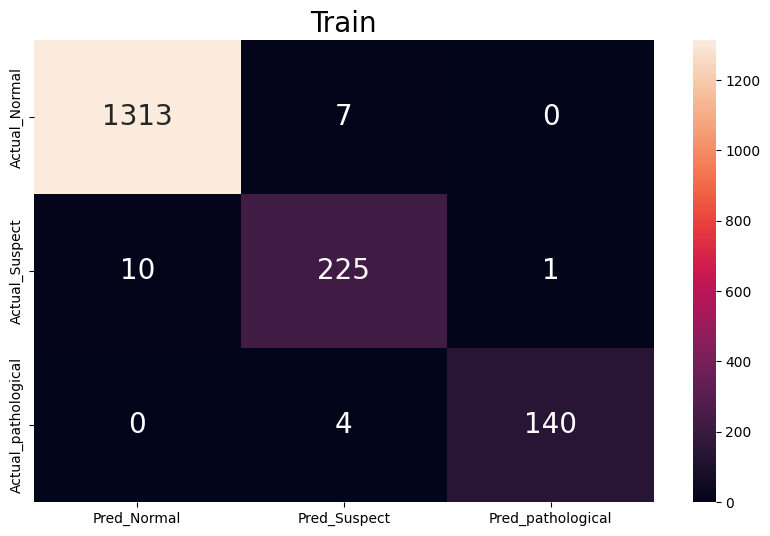

------------------------------
test_data
f1_score : 0.84056
accuracy : 0.92019


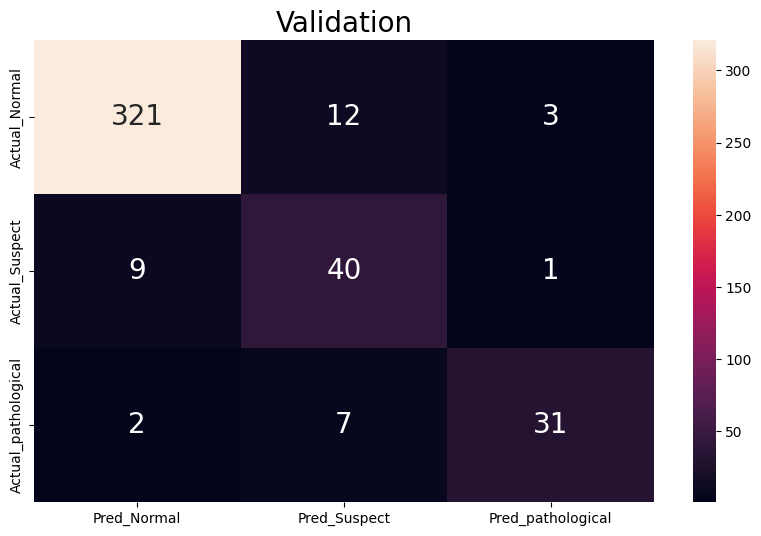

In [63]:
print('train_data')
f1_train = round(f1_score(y_train_pred.argmax(axis=1)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(y_train_pred.argmax(axis=1)+[1],y_train),5)
print(f'accuracy : {acc_train}')

plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(y_train_pred.argmax(axis=1)+[1],y_train),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Train',fontsize=20)
plt.savefig('tf_high_conf_train.png')
plt.show()
print('-'*30)
print('test_data')

x_test_tensor = tf.constant(x_test,tf.float32)

f1_test = round(f1_score(y_test_pred.argmax(axis=1)+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(y_test_pred.argmax(axis=1)+[1],y_test),5)
print(f'accuracy : {acc_test}')
plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(y_test_pred.argmax(axis=1)+[1],y_test),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Validation',fontsize=20)
plt.savefig('tf_high_conf_test.png')
plt.show()

In [17]:
hxFn(x_t).shape

(1700,)

In [58]:
# torch_low
import torch
x = torch.FloatTensor(x_train.values)
x_t = torch.FloatTensor(x_test.values)
y = torch.FloatTensor(y_trainOHE.values)

w1 = torch.empty( [21,64], requires_grad=True ) 
b1 = torch.empty( [64], requires_grad=True)
torch.nn.init.uniform_(w1)
torch.nn.init.uniform_(b1)

w2 = torch.empty( [64,32], requires_grad=True ) 
b2 = torch.empty( [32], requires_grad=True)
torch.nn.init.uniform_(w2)
torch.nn.init.uniform_(b2)

w3 = torch.empty( [32,3], requires_grad=True ) 
b3 = torch.empty( [3], requires_grad=True)
torch.nn.init.uniform_(w3)
torch.nn.init.uniform_(b3)

def cost():
    z1 = torch.matmul(x,w1) + b1
    x_hat_1 = torch.relu(z1)
    
    z2 = torch.matmul(x_hat_1,w2) + b2
    x_hat_2 = torch.relu(z2)
    
    z3 = torch.matmul(x_hat_2,w3) + b3
    c_i = torch.nn.functional.cross_entropy(z3,y)
    c = torch.mean(c_i)
    return c

def hxFn(x_data):
    xd = torch.FloatTensor(x_data)
    
    z1 = torch.matmul(xd,w1) + b1
    x_hat_1 = torch.relu(z1)
    
    z2 = torch.matmul(x_hat_1,w2) + b2
    x_hat_2 = torch.relu(z2)
    
    z3 = torch.matmul(x_hat_2,w3) + b3
    hx = torch.softmax(z3,dim=1)
    return hx.detach().numpy().argmax(axis=1)

tor_low_trian_acc_score = list()
tor_low_validate_acc_score = list()

optimizer = torch.optim.Adam( [w1,w2,w3,b1,b2,b3], lr=0.01)
for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    curent_train_acc=accuracy_score(hxFn(x)+[1],y_train)
    tor_low_trian_acc_score.append(curent_train_acc)
    curent_test_acc=accuracy_score(hxFn(x_t)+[1],y_test)
    tor_low_validate_acc_score.append(curent_test_acc)
    optimizer.step()
    print(f'{epoch}','cost', c.item(), f'train_acc : => {curent_train_acc}',f'test_acc : => {curent_test_acc}' )

0 cost 40.57166290283203 train_acc : => 0.778235294117647 test_acc : => 0.7793427230046949
1 cost 9.757558822631836 train_acc : => 0.7770588235294118 test_acc : => 0.7793427230046949
2 cost 48.70210647583008 train_acc : => 0.22588235294117648 test_acc : => 0.23708920187793428
3 cost 35.754798889160156 train_acc : => 0.22764705882352942 test_acc : => 0.2511737089201878
4 cost 11.314059257507324 train_acc : => 0.24764705882352941 test_acc : => 0.2605633802816901
5 cost 13.035797119140625 train_acc : => 0.7788235294117647 test_acc : => 0.7793427230046949
6 cost 23.17576026916504 train_acc : => 0.778235294117647 test_acc : => 0.7793427230046949
7 cost 29.00649642944336 train_acc : => 0.778235294117647 test_acc : => 0.7793427230046949
8 cost 31.392160415649414 train_acc : => 0.778235294117647 test_acc : => 0.7793427230046949
9 cost 30.998170852661133 train_acc : => 0.778235294117647 test_acc : => 0.7793427230046949
10 cost 28.354446411132812 train_acc : => 0.778235294117647 test_acc : => 0.

In [59]:
torch_low_acc_df=pd.DataFrame([np.array(tor_low_trian_acc_score),np.array(tor_low_validate_acc_score)]).transpose()
torch_low_acc_df.columns = ['train_acc','val_acc']
torch_low_acc_df.to_csv('torch_low_acc_df.csv',index=False)

train_data
f1_score : 0.90879
accuracy : 0.94824


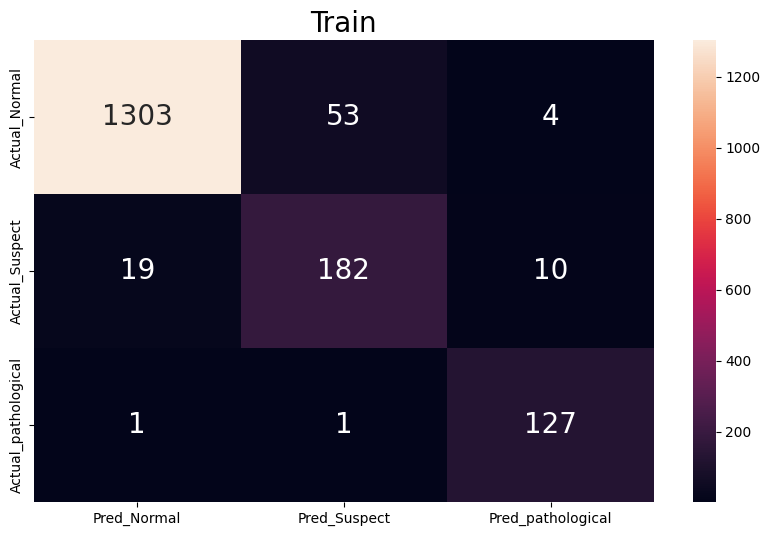

------------------------------
test_data
f1_score : 0.8251
accuracy : 0.91315


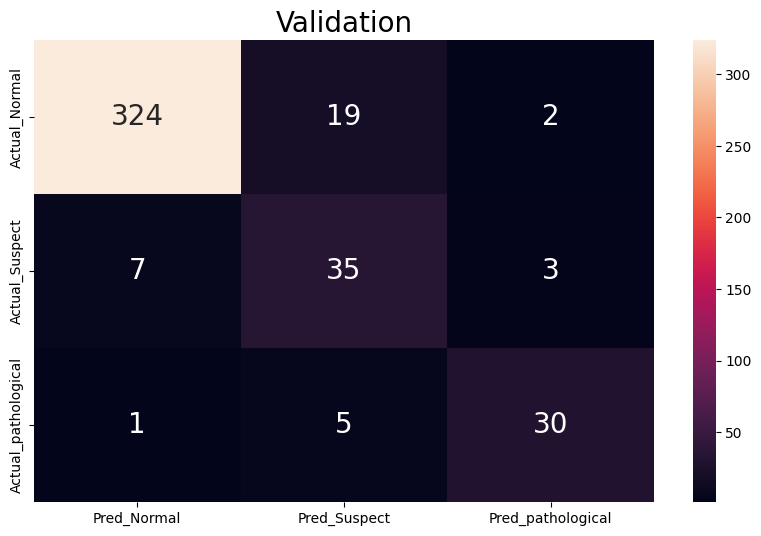

In [60]:
print('train_data')
f1_train = round(f1_score(hxFn(x)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(hxFn(x)+[1],y_train),5)
print(f'accuracy : {acc_train}')

plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(hxFn(x)+[1],y_train),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Train',fontsize=20)
plt.savefig('torch_low_conf_train.png')
plt.show()
print('-'*30)
print('test_data')

x_test_tensor = tf.constant(x_test,tf.float32)

f1_test = round(f1_score(hxFn(x_test.values)+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(hxFn(x_test.values)+[1],y_test),5)
print(f'accuracy : {acc_test}')
plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(hxFn(x_test.values)+[1],y_test),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Validation',fontsize=20)
plt.savefig('torch_low_conf_test.png')
plt.show()

In [54]:
# torch_high based on class
import torch
from torch.optim import Adam
from torch.nn import Linear, Sequential, Module, CrossEntropyLoss, Softmax, ReLU
class MultiClass(Module):
    """
    mutli_classification
    fashion_mnist => flatten (28*28)
    (28*28) => (128)
    (128) => (64)
    (64) => (10)
    """
    def __init__(self) -> None:
        super().__init__()    
        self.nn1 = Linear(21,64)
        self.nn2 = Linear(64,32)
        self.nn3 = Linear(32,3)
        self.relu1 = ReLU()
        self.relu2 = ReLU()
        self.sm1 = Softmax(dim=1)
    def forward(self, x):
        x = self.nn1(x)
        x = self.relu1(x)
        
        x = self.nn2(x)
        x = self.relu1(x)
        
        x = self.nn3(x)
        x = self.sm1(x)
        return x
    
x_train_tensor = torch.FloatTensor(x_train.values)
x_test_tensor = torch.FloatTensor(x_test.values)

y_train_tensor = torch.FloatTensor(y_trainOHE.values)
y_test_tensor = torch.FloatTensor(y_testOHE.values)


model = MultiClass()
loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 0.001)

tor_high_trian_acc_score = list()
tor_high_validate_acc_score = list()

for epoch in range(1000):
    optimizer.zero_grad()
    x_hat = model(x_train_tensor)
    x_hat_test = model(x_test_tensor)
    cost = loss_fn(x_hat,y_train_tensor)
    cost.backward()
    optimizer.step()
    current_train_acc = accuracy_score(
        x_hat.argmax(axis=1).detach().numpy(),
        y_train_tensor.argmax(axis=1).detach().numpy()
    )
    tor_high_trian_acc_score.append(current_train_acc)
    current_test_acc = accuracy_score(
        x_hat_test.argmax(axis=1).detach().numpy(),
        y_test_tensor.argmax(axis=1).detach().numpy()
    )
    tor_high_validate_acc_score.append(current_test_acc)
    
    print(f'epoch => {epoch} / cost => {cost.item()} / acc => {current_train_acc}')

epoch => 0 / cost => 1.0958045721054077 / acc => 0.31882352941176473
epoch => 1 / cost => 1.0894174575805664 / acc => 0.38941176470588235
epoch => 2 / cost => 1.0831090211868286 / acc => 0.4682352941176471
epoch => 3 / cost => 1.0767124891281128 / acc => 0.5511764705882353
epoch => 4 / cost => 1.070188045501709 / acc => 0.62
epoch => 5 / cost => 1.063458800315857 / acc => 0.6923529411764706
epoch => 6 / cost => 1.0564590692520142 / acc => 0.7411764705882353
epoch => 7 / cost => 1.0497627258300781 / acc => 0.7647058823529411
epoch => 8 / cost => 1.0435888767242432 / acc => 0.7770588235294118
epoch => 9 / cost => 1.037619948387146 / acc => 0.7788235294117647
epoch => 10 / cost => 1.0315799713134766 / acc => 0.778235294117647
epoch => 11 / cost => 1.0254542827606201 / acc => 0.778235294117647
epoch => 12 / cost => 1.0192511081695557 / acc => 0.778235294117647
epoch => 13 / cost => 1.0129698514938354 / acc => 0.778235294117647
epoch => 14 / cost => 1.0066012144088745 / acc => 0.77823529411

In [55]:
torch_high_acc_df=pd.DataFrame([np.array(tor_high_trian_acc_score),np.array(tor_high_validate_acc_score)]).transpose()
torch_high_acc_df.columns = ['train_acc','val_acc']
torch_high_acc_df.to_csv('torch_high_acc_df.csv',index=False)

train_data
f1_score : 0.58466
accuracy : 0.88765


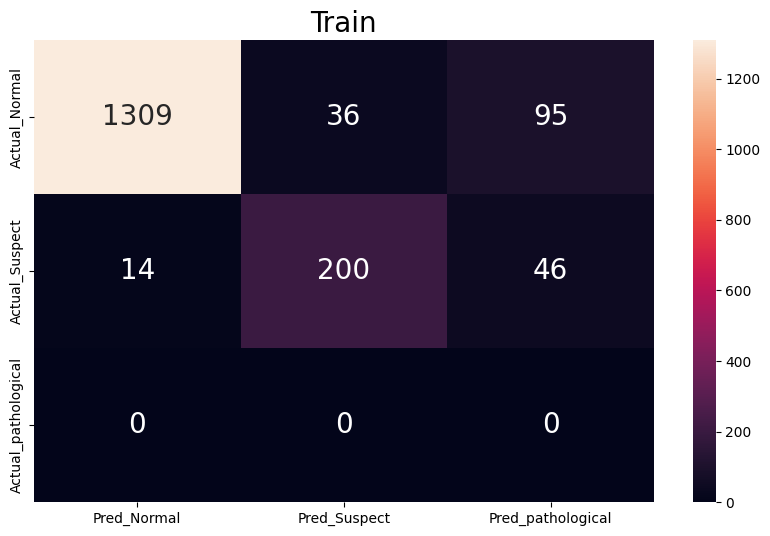

------------------------------
test_data
f1_score : 0.55454
accuracy : 0.86385


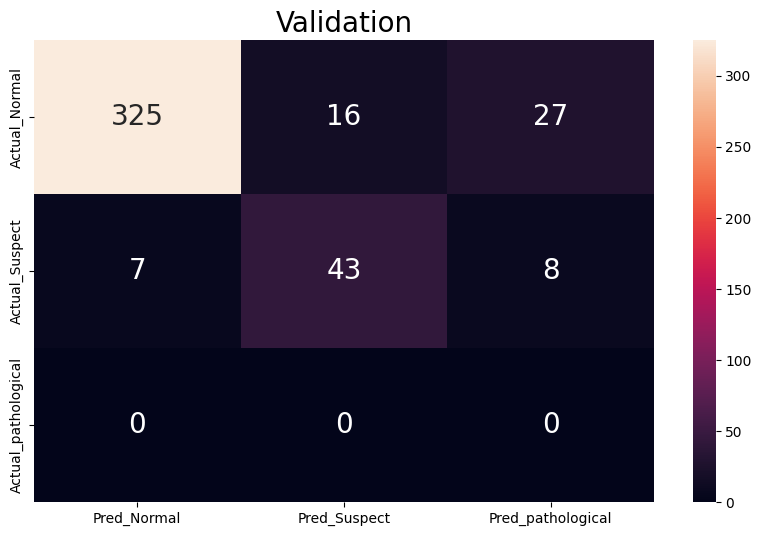

In [57]:
print('train_data')
f1_train = round(f1_score(x_hat.argmax(axis=1).detach().numpy()+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(x_hat.argmax(axis=1).detach().numpy()+[1],y_train),5)
print(f'accuracy : {acc_train}')

plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(x_hat.argmax(axis=1).detach().numpy()+[1],y_train),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Train',fontsize=20)
plt.savefig('torch_high_conf_train.png')
plt.show()
print('-'*30)
print('test_data')

x_test_tensor = tf.constant(x_test,tf.float32)

f1_test = round(f1_score(x_hat_test.argmax(axis=1).detach().numpy()+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(x_hat_test.argmax(axis=1).detach().numpy()+[1],y_test),5)
print(f'accuracy : {acc_test}')
plt.figure(figsize=(10,6))
sns.heatmap(
    confusion_matrix(x_hat_test.argmax(axis=1).detach().numpy()+[1],y_test),
    annot=True,
    fmt='d',
    xticklabels=['Pred_Normal','Pred_Suspect','Pred_pathological'],
    yticklabels=['Actual_Normal','Actual_Suspect','Actual_pathological'],
    annot_kws={"size": 20}
)
plt.title('Validation',fontsize=20)
plt.savefig('torch_high_conf_test.png')
plt.show()

Text(0, 0.5, 'Count')

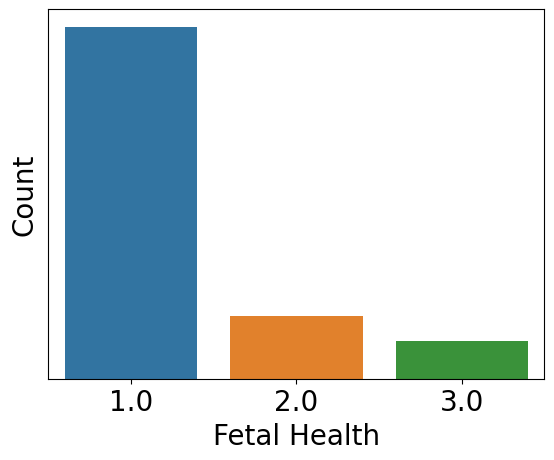

In [82]:
temp=pd.DataFrame(pd.DataFrame(target).value_counts())

sns.barplot(
    data=temp.reset_index(),
    x='fetal_health',
    y=0
)
plt.xticks(fontsize=20)
plt.yticks([])
plt.xlabel('Fetal Health',fontsize=20)
plt.ylabel('Count',fontsize=20)


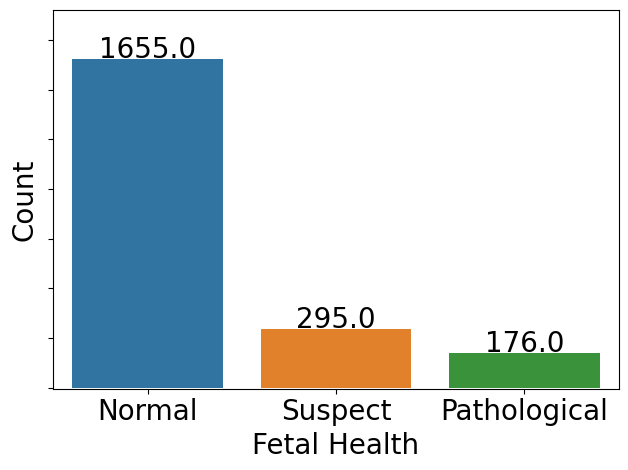

In [101]:
ax = sns.countplot(x = 'fetal_health', data = pd.DataFrame(target))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
ax.set_ylim(-5, 1900)
# plt.tight_layout()
ax.set_xticklabels(['Normal','Suspect','Pathological'],fontsize=20)
ax.set_yticklabels([])
ax.set_xlabel('Fetal Health',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
plt.tight_layout()
plt.savefig('target_hist.png')
plt.show()

In [ ]:
['Normal','Suspect','Pathological']